<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/China_gdp(Q_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
data=pd.read_csv("china_gdp.csv")

In [ ]:
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1012.0 bytes


In [ ]:
# Extract independent and dependent variables
X = data["Year"].values
y = data["Value"].values

In [ ]:
# Step 2: Define Non-linear Model (Logistic Growth Function)
# ------------------------------------------------
def logistic_function(x, a, b, c):
    """
    Logistic growth model for GDP prediction.
    Parameters:
        a = maximum GDP value (carrying capacity)
        b = growth rate
        c = midpoint (year of fastest growth)
    """
    return a / (1 + np.exp(-b * (x - c)))

# ------------------------------------------------
# Step 3: Fit Non-linear Regression Model
# ------------------------------------------------
# Initial parameter guess
initial_guess = [1e13, 0.03, 1990]

# Curve fitting using non-linear least squares
popt, pcov = curve_fit(logistic_function, X, y, p0=initial_guess)

# Extract fitted parameters
a, b, c = popt
print(f"Fitted Parameters:\n a = {a:.3e}\n b = {b:.5f}\n c = {c:.2f}\n")


Fitted Parameters:
 a = 4.998e+13
 b = 0.17524
 c = 2021.37



In [ ]:
# Step 4: Make Predictions
# ------------------------------------------------
y_pred = logistic_function(X, *popt)


In [ ]:
# Step 5: Evaluate Model Performance
# ------------------------------------------------
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Model Performance Metrics:")
print(f"R² Value: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4e}\n")


Model Performance Metrics:
R² Value: 0.9938
Root Mean Squared Error (RMSE): 1.9523e+11



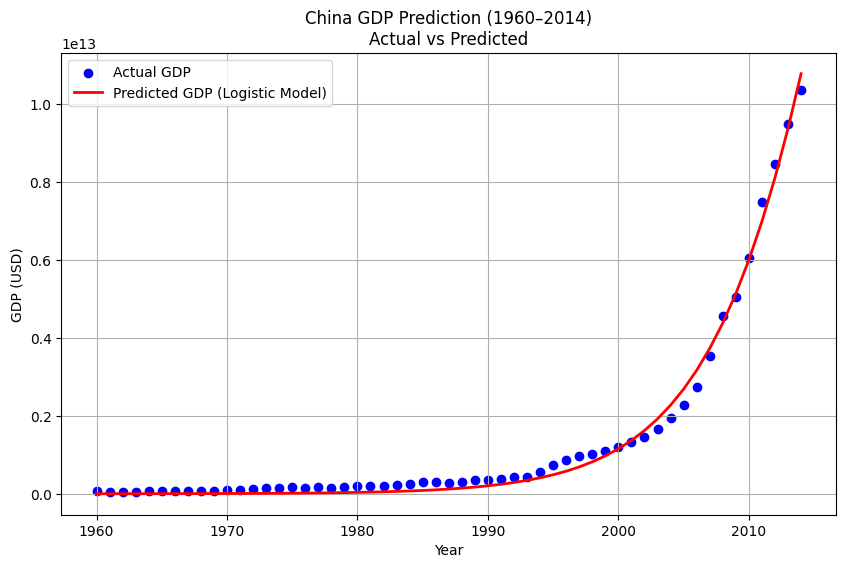

In [ ]:
# Step 6: Visualization (Actual vs Predicted)
# ------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Actual GDP", color="blue")
plt.plot(X, y_pred, label="Predicted GDP (Logistic Model)", color="red", linewidth=2)
plt.title("China GDP Prediction (1960–2014)\nActual vs Predicted")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.legend()
plt.grid(True)
plt.show()